# Stat 5241 Statistical Machine Learning Final Project
## Author: Gexin Chen     Uni: gc2936

# 1. BackGround

<font size="3">The MNIST database of handwritten digits is one of the most commonly used dataset for training
various image processing systems and machine learning algorithms. MNIST has a training set of
60,000 examples, and a test set of 10,000 examples. It is a good database for people who want to
try learning techniques and pattern recognition methods on real-world data while spending minimal
efforts on preprocessing and formatting.
MNIST is a subset of a larger set available from NIST. The digits have been size-normalized
and centered in a fixed-size image. The original black and white (bilevel) images from NIST were
size normalized. The resulting images contain grey levels as a result of the anti-aliasing technique
used by the normalization algorithm. The images were centered in a 28 ×28 image by computing
the center of mass of the pixels, and translating the image so as to position this point at the center
of the 28 ×28 field.</font>

# 2. Data Processing

In [3]:
# Import Required Packages
import time
import pandas as pd
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt
import numpy as np
from pylab import *
from sklearn import preprocessing
import tensorflow as tf
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.advanced_activations import LeakyReLU
from keras.layers import BatchNormalization

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

In [3]:
# Data download and preprocessing

DOWNLOAD_MNIST = False # If already download , set as False
train_data = MNIST(
 root='../data/mnist/',
 train=True , # this is training data
 #transform=torchvision.transforms.ToTensor (),
 download=DOWNLOAD_MNIST ,
 )

test_data = MNIST(root='../data/ mnist/', train=False, download=DOWNLOAD_MNIST)

 # change the features to numpy
X_train = train_data.train_data.numpy()
X_test = test_data.test_data.numpy ()

 # change the labels to numpy
Y_train = train_data.train_labels.numpy()
Y_test = test_data.test_labels.numpy ()

/Users/gexin/opt/anaconda3/lib/python3.9/site-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/Users/gexin/opt/anaconda3/lib/python3.9/site-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/Users/gexin/opt/anaconda3/lib/python3.9/site-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/Users/gexin/opt/anaconda3/lib/python3.9/site-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [3]:
my_X_train = X_train.reshape(-1,28,28,1)
my_X_test = X_test.reshape(-1,28,28,1)

## 1. (a)

3


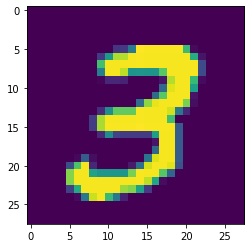

In [4]:
# Plot The Feature Parameters
imshow(X_train[7]);

# Return the Output 
print(Y_train[7])

From above image, we can see the number is '3' which matches the label in Y_train.

## 1. (b)

In [5]:
# Check Dimensions
[shape(X_test),shape(X_train)]

[(10000, 28, 28), (60000, 28, 28)]

In [6]:
# Data Reshape
X_train = X_train.reshape(-1,28*28)
X_test = X_test.reshape(-1, 28*28)

In [7]:
# Data Normalization
X_train = preprocessing.normalize(X_train)
X_test = preprocessing.normalize(X_test)

## 1. (c)

In [8]:
# One Hot Encoding
onehot = preprocessing.OneHotEncoder(sparse = False)
onehot.fit(Y_train.reshape(-1,1))
Y_train_oh = onehot.transform(Y_train.reshape(-1,1))
Y_test_oh = onehot.transform(Y_test.reshape(-1,1))

One hot embedding transfer every labels to 1*N matrix containing only 0 and 1. In this way, each label can be treated equally by machine learning algorithm, which is difficult to be achieved by using numerical values to represent classes

# 3. Before Deep Learning

## 2. (a)

In [9]:
# KNN training
KNN = KNeighborsClassifier(n_neighbors=3).fit(X_train, Y_train_oh)

In [10]:
1 - KNN.score(X_test, Y_test_oh)

0.02729999999999999

In [11]:
# Adaboost Training
ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3)).fit(X_train, Y_train)

In [12]:
1 - ada.score(X_test, Y_test)

0.1965

In [13]:
# SVM with Gaussian Kernel
svm = SVC().fit(X_train, Y_train)

In [14]:
1 - svm.score(X_test, Y_test)

0.018900000000000028

From above, we can see that the test errors of all three algorithms are different from the given result. It can be caused by multiple reasons:  
1. The data we used above may be different from the data authors used;
2. The preprocessing procedures are different;
3. The hyperparameters for the three algorithms may be different.

## 2. (b)

In [15]:
# Variables Assign
batch_size = 64
num_classes = 10
epochs = 30

In [16]:
mymodel = Sequential()
mymodel.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
mymodel.add(LeakyReLU(alpha=0.1))
mymodel.add(MaxPooling2D((2, 2),padding='same'))
mymodel.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
mymodel.add(LeakyReLU(alpha=0.1))
mymodel.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
mymodel.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
mymodel.add(LeakyReLU(alpha=0.1))                  
mymodel.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
mymodel.add(Flatten())
mymodel.add(Dense(128, activation='linear'))
mymodel.add(LeakyReLU(alpha=0.1))                  
mymodel.add(Dense(num_classes, activation='softmax'))

2022-04-24 13:53:36.483944: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [17]:
mymodel.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam',
                      metrics=['accuracy'])
mymodel.fit(my_X_train, Y_train_oh, batch_size=batch_size,epochs=epochs)


Epoch 1/30
938/938 [==============================] - 78s 82ms/step - loss: 0.4488 - accuracy: 0.9473
Epoch 2/30
938/938 [==============================] - 81s 87ms/step - loss: 0.0522 - accuracy: 0.9840
Epoch 3/30
938/938 [==============================] - 72s 77ms/step - loss: 0.0379 - accuracy: 0.9881
Epoch 4/30
938/938 [==============================] - 73s 77ms/step - loss: 0.0358 - accuracy: 0.9890
Epoch 5/30
938/938 [==============================] - 74s 79ms/step - loss: 0.0298 - accuracy: 0.9910
Epoch 6/30
938/938 [==============================] - 69s 74ms/step - loss: 0.0290 - accuracy: 0.9908
Epoch 7/30
938/938 [==============================] - 76s 81ms/step - loss: 0.0311 - accuracy: 0.9908
Epoch 8/30
938/938 [==============================] - 71s 75ms/step - loss: 0.0311 - accuracy: 0.9913
Epoch 9/30
938/938 [==============================] - 68s 72ms/step - loss: 0.0252 - accuracy: 0.9924
Epoch 10/30
938/938 [==============================] - 70s 75ms/step - loss: 0.023

In [18]:
test_error = mymodel.evaluate(my_X_test, Y_test_oh)[1]

313/313 [==============================] - 4s 11ms/step - loss: 0.1786 - accuracy: 0.9861


In [19]:
print('The test error of my favorite classifier is:', 1 - test_error)

The test error of my favorite classifier is: 0.01389998197555542


It can be observed that the test error is lower than that of all three algorithms from part (a).

# 4. Deep Leaning

In [121]:
# Define Required Plot Function
def loss_plot(train,test):
    index = []
    train_set = []
    test_set = []
    for i in range(len(train)):
        index.append(i+1)
        train_set.append(train[i][0])
        test_set.append(test[i][0])
    plt.plot(index, train_set, label = "Train")
    plt.plot(index, test_set, label = "Test")
    plt.legend()
    plt.xlabel("Number of Iterations")
    plt.ylabel("Loss Function")
    plt.title("Loss vs. Epochs Plot")
    
def error_plot(train,test):
    index = []
    train_set = []
    test_set = []
    for i in range(len(train)):
        index.append(i+1)
        train_set.append(1 - train[i][1])
        test_set.append(1 - test[i][1])
    plt.plot(index, train_set, label = "Train")
    plt.plot(index, test_set, label = "Test")
    plt.legend()
    plt.xlabel("Number of Iterations")
    plt.ylabel("Classification Error")
    plt.title("Classification Error vs. Epochs Plot")

In [122]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using {} device'.format(device))

Using cpu device


In [123]:
# Data Type Convert
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))])

# Read Data
train_data = MNIST(root='../data/mnist/', train=True, download=False, transform = transform)

test_data = MNIST(root='../data/ mnist/', train=False, download=False, transform = transform)

## 3. (a) &  (b)

In [124]:
# Create a Fully Connected Neural Network
class ANN(nn.Module):
    def __init__(self, input_size, num_classes):
        super(ANN, self).__init__()
        self.flatten = nn.Flatten()
        self.layer1 = nn.Linear(input_size, 100)
        self.layer2 = nn.Linear(100, num_classes)
   
    def forward(self, x):
        x = self.flatten(x)
        x = torch.sigmoid(self.layer1(x))
        x = self.layer2(x)
        return x

In [7]:
def train_loop(dataloader, model, loss_fn, optimizer):
    running_loss, correct = 0, 0
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)
        running_loss += loss.item() * X.size(0)
        correct += (pred.argmax(1) == y).type(torch.float).sum().item()
        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    running_loss = running_loss / size
    correct /= size
    print('Training loss: {}'.format(running_loss))
    print('Training accuracy: {}'.format(correct))
    return running_loss, correct


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print('Testing loss: {}'.format(test_loss))
    print('Testing accuracy: {}'.format(correct))
    return test_loss, correct

### Seed 1

In [28]:
# Define HyperParameters
input_size = 784
num_classes = 10
learning_rate = 0.1 
batch_size = 64
num_epochs = 1000
model1 = ANN(input_size, num_classes)

# Define Loss & Optimizer
loss = nn.CrossEntropyLoss()
optimizer = optim.SGD(model1.parameters(), lr = learning_rate)

In [8]:
# Set Seed
torch.manual_seed(1) 

# Data Loading
train_loader = DataLoader(dataset = train_data, batch_size = batch_size, shuffle = True)
test_loader = DataLoader(dataset = test_data, batch_size = batch_size, shuffle = True)



start_time = time.time()
test_loss_record = []
train_loss_record =[]
for i in range(num_epochs):
    print(f"Epoch {i+1}\n-------------------------------")
    train_loss_record.append(train_loop(train_loader,model1,loss,optimizer))
    test_loss_record.append(test_loop(test_loader,model1,loss))
    if test_loss_record[i] < 0.85:
        break
print('Done')
print('Total Time Consumed: {}'.format(time.time() - start_time))

Epoch 1
-------------------------------
Training loss: 0.6312321174780527
Training accuracy: 0.8388166666666667
Testing loss: 0.32605285197496414
Testing accuracy: 0.9114
Epoch 2
-------------------------------
Training loss: 0.30747619849443436
Training accuracy: 0.9101333333333333
Testing loss: 0.2652289485855467
Testing accuracy: 0.9222
Epoch 3
-------------------------------
Training loss: 0.25936088887055714
Training accuracy: 0.9242333333333334
Testing loss: 0.2467449258087547
Testing accuracy: 0.9275
Epoch 4
-------------------------------
Training loss: 0.22716621174017587
Training accuracy: 0.9343833333333333
Testing loss: 0.2099801887325041
Testing accuracy: 0.9393
Epoch 5
-------------------------------
Training loss: 0.20135708603461583
Training accuracy: 0.94155
Testing loss: 0.20063233762315125
Testing accuracy: 0.9412
Epoch 6
-------------------------------
Training loss: 0.1818713160375754
Training accuracy: 0.9471166666666667
Testing loss: 0.17156985816160206
Testing a

Testing loss: 0.07407478763941366
Testing accuracy: 0.9773
Epoch 50
-------------------------------
Training loss: 0.02773880961301426
Training accuracy: 0.99435
Testing loss: 0.07299135281010323
Testing accuracy: 0.977
Epoch 51
-------------------------------
Training loss: 0.026979105322311323
Training accuracy: 0.9946666666666667
Testing loss: 0.0725723628331403
Testing accuracy: 0.9778
Epoch 52
-------------------------------
Training loss: 0.02607918769295017
Training accuracy: 0.9951166666666666
Testing loss: 0.07152165462423092
Testing accuracy: 0.9781
Epoch 53
-------------------------------
Training loss: 0.02541297235613068
Training accuracy: 0.9952666666666666
Testing loss: 0.07187859226347416
Testing accuracy: 0.9774
Epoch 54
-------------------------------
Training loss: 0.02487600939149658
Training accuracy: 0.9953666666666666
Testing loss: 0.0750021615842725
Testing accuracy: 0.9766
Epoch 55
-------------------------------
Training loss: 0.02399674431420863
Training accu

Training loss: 0.0096693051956594
Training accuracy: 0.9994
Testing loss: 0.07252712496467362
Testing accuracy: 0.9786
Epoch 99
-------------------------------
Training loss: 0.009507118334559103
Training accuracy: 0.9995166666666667
Testing loss: 0.07246557981254842
Testing accuracy: 0.9782
Epoch 100
-------------------------------
Training loss: 0.009324274179153144
Training accuracy: 0.9995333333333334
Testing loss: 0.07222756499329665
Testing accuracy: 0.9777
Epoch 101
-------------------------------
Training loss: 0.00922258551158011
Training accuracy: 0.99955
Testing loss: 0.07099083842039346
Testing accuracy: 0.9781
Epoch 102
-------------------------------
Training loss: 0.009007129730843007
Training accuracy: 0.99955
Testing loss: 0.07203882252411906
Testing accuracy: 0.9774
Epoch 103
-------------------------------
Training loss: 0.00886084193860491
Training accuracy: 0.9995333333333334
Testing loss: 0.07225495158801461
Testing accuracy: 0.978
Epoch 104
----------------------

Testing loss: 0.07428963483640462
Testing accuracy: 0.9781
Epoch 147
-------------------------------
Training loss: 0.004943513346556574
Training accuracy: 0.99995
Testing loss: 0.07377906280620154
Testing accuracy: 0.9778
Epoch 148
-------------------------------
Training loss: 0.004911605197004974
Training accuracy: 0.99995
Testing loss: 0.07399287143541251
Testing accuracy: 0.978
Epoch 149
-------------------------------
Training loss: 0.004851995894561211
Training accuracy: 0.99995
Testing loss: 0.07437987723402607
Testing accuracy: 0.9787
Epoch 150
-------------------------------
Training loss: 0.004765998089375595
Training accuracy: 0.9999666666666667
Testing loss: 0.07489689214619998
Testing accuracy: 0.9779
Done
Total Time Consumed: 2234.873111963272


In [ ]:
loss_plot(train_loss_record, test_loss_record)

In [ ]:
error_plot(train_loss_record, test_loss_record)

In [11]:
torch.save(model1.state_dict(), '../output/ANN/ANN1_params.pkl')

### Seed 2

In [ ]:
# Define HyperParameters
input_size = 784
num_classes = 10
learning_rate = 0.1 
batch_size = 64
num_epochs = 150
model2 = ANN(input_size, num_classes)

# Define Loss & Optimizer
loss = nn.CrossEntropyLoss()
optimizer = optim.SGD(model2.parameters(), lr = learning_rate)

In [9]:
# Set Seed
torch.manual_seed(2) 

# Data Loading
train_loader = DataLoader(dataset = train_data, batch_size = batch_size, shuffle = True)
test_loader = DataLoader(dataset = test_data, batch_size = batch_size, shuffle = True)



start_time = time.time()
test_loss_record = []
train_loss_record =[]
for i in range(num_epochs):
    print(f"Epoch {i+1}\n-------------------------------")
    train_loss_record.append(train_loop(train_loader,model2,loss,optimizer))
    test_loss_record.append(test_loop(test_loader,model2,loss))
print('Done')
print('Total Time Consumed: {}'.format(time.time() - start_time))

Epoch 1
-------------------------------
Training loss: 0.0047495700763538476
Training accuracy: 0.99995
Testing loss: 0.07491658408280794
Testing accuracy: 0.978
Epoch 2
-------------------------------
Training loss: 0.004693165396464367
Training accuracy: 0.9999666666666667
Testing loss: 0.07470454824057698
Testing accuracy: 0.9782
Epoch 3
-------------------------------


KeyboardInterrupt: 

In [ ]:
loss_plot(train_loss_record, test_loss_record)

In [ ]:
error_plot(train_loss_record, test_loss_record)

In [ ]:
torch.save(model2.state_dict(), '../output/ANN/ANN2_params.pkl')

### Seed 3

In [ ]:
# Define HyperParameters
input_size = 784
num_classes = 10
learning_rate = 0.1 
batch_size = 64
num_epochs = 150
model3 = ANN(input_size, num_classes)

# Define Loss & Optimizer
loss = nn.CrossEntropyLoss()
optimizer = optim.SGD(model3.parameters(), lr = learning_rate)

In [ ]:
# Set Seed
torch.manual_seed(3) 

# Data Loading
train_loader = DataLoader(dataset = train_data, batch_size = batch_size, shuffle = True)
test_loader = DataLoader(dataset = test_data, batch_size = batch_size, shuffle = True)



start_time = time.time()
test_loss_record = []
train_loss_record =[]
for i in range(num_epochs):
    print(f"Epoch {i+1}\n-------------------------------")
    train_loss_record.append(train_loop(train_loader,model3,loss,optimizer))
    test_loss_record.append(test_loop(test_loader,model3,loss))
print('Done')
print('Total Time Consumed: {}'.format(time.time() - start_time))

In [ ]:
loss_plot(train_loss_record, test_loss_record)

In [ ]:
error_plot(train_loss_record, test_loss_record)

In [ ]:
torch.save(model3.state_dict(), '../output/ANN/ANN3_params.pkl')

### Seed 4

In [ ]:
# Define HyperParameters
input_size = 784
num_classes = 10
learning_rate = 0.1 
batch_size = 64
num_epochs = 150
model4 = ANN(input_size, num_classes)

# Define Loss & Optimizer
loss = nn.CrossEntropyLoss()
optimizer = optim.SGD(model4.parameters(), lr = learning_rate)

In [ ]:
# Set Seed
torch.manual_seed(4) 

# Data Loading
train_loader = DataLoader(dataset = train_data, batch_size = batch_size, shuffle = True)
test_loader = DataLoader(dataset = test_data, batch_size = batch_size, shuffle = True)



start_time = time.time()
test_loss_record = []
train_loss_record =[]
for i in range(num_epochs):
    print(f"Epoch {i+1}\n-------------------------------")
    train_loss_record.append(train_loop(train_loader,model4,loss,optimizer))
    test_loss_record.append(test_loop(test_loader,model4,loss))
print('Done')
print('Total Time Consumed: {}'.format(time.time() - start_time))

In [ ]:
loss_plot(train_loss_record, test_loss_record)

In [ ]:
error_plot(train_loss_record, test_loss_record)

In [ ]:
torch.save(model4.state_dict(), '../output/ANN/ANN4_params.pkl')

### Seed 5

In [ ]:
# Define HyperParameters
input_size = 784
num_classes = 10
learning_rate = 0.1 
batch_size = 64
num_epochs = 150
model5 = ANN(input_size, num_classes)

# Define Loss & Optimizer
loss = nn.CrossEntropyLoss()
optimizer = optim.SGD(model5.parameters(), lr = learning_rate)

In [ ]:
# Set Seed
torch.manual_seed(5) 

# Data Loading
train_loader = DataLoader(dataset = train_data, batch_size = batch_size, shuffle = True)
test_loader = DataLoader(dataset = test_data, batch_size = batch_size, shuffle = True)



start_time = time.time()
test_loss_record = []
train_loss_record =[]
for i in range(num_epochs):
    print(f"Epoch {i+1}\n-------------------------------")
    train_loss_record.append(train_loop(train_loader,model5,loss,optimizer))
    test_loss_record.append(test_loop(test_loader,model5,loss))
print('Done')
print('Total Time Consumed: {}'.format(time.time() - start_time))

In [ ]:
loss_plot(train_loss_record, test_loss_record)

In [ ]:
error_plot(train_loss_record, test_loss_record)

In [ ]:
torch.save(model5.state_dict(), '../output/ANN/ANN5_params.pkl')

## 3. (d)

### Learning Rate = 0.01

In [ ]:
# Define HyperParameters
input_size = 784
num_classes = 10
learning_rate = 0.01 
batch_size = 64
num_epochs = 150
model_lr01 = ANN(input_size, num_classes)

# Define Loss & Optimizer
loss = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_lr01.parameters(), lr = learning_rate)

In [ ]:
# Set Seed
torch.manual_seed(1) 

# Data Loading
train_loader = DataLoader(dataset = train_data, batch_size = batch_size, shuffle = True)
test_loader = DataLoader(dataset = test_data, batch_size = batch_size, shuffle = True)



start_time = time.time()
test_loss_record = []
train_loss_record =[]
for i in range(num_epochs):
    print(f"Epoch {i+1}\n-------------------------------")
    train_loss_record.append(train_loop(train_loader,model_lr01,loss,optimizer))
    test_loss_record.append(test_loop(test_loader,model_lr01,loss))
print('Done')
print('Total Time Consumed: {}'.format(time.time() - start_time))

In [ ]:
loss_plot(train_loss_record, test_loss_record)

In [ ]:
error_plot(train_loss_record, test_loss_record)

In [ ]:
torch.save(model_lr01.state_dict(), '../output/ANN/ANN_lr01_params.pkl')

### Learning Rate = 0.2

In [ ]:
# Define HyperParameters
input_size = 784
num_classes = 10
learning_rate = 0.2
batch_size = 64
num_epochs = 150
model_lr2 = ANN(input_size, num_classes)

# Define Loss & Optimizer
loss = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_lr2.parameters(), lr = learning_rate)

In [ ]:
# Set Seed
torch.manual_seed(1) 

# Data Loading
train_loader = DataLoader(dataset = train_data, batch_size = batch_size, shuffle = True)
test_loader = DataLoader(dataset = test_data, batch_size = batch_size, shuffle = True)



start_time = time.time()
test_loss_record = []
train_loss_record =[]
for i in range(num_epochs):
    print(f"Epoch {i+1}\n-------------------------------")
    train_loss_record.append(train_loop(train_loader,model_lr2,loss,optimizer))
    test_loss_record.append(test_loop(test_loader,model_lr2,loss))
print('Done')
print('Total Time Consumed: {}'.format(time.time() - start_time))

In [ ]:
loss_plot(train_loss_record, test_loss_record)

In [ ]:
error_plot(train_loss_record, test_loss_record)

In [ ]:
torch.save(model_lr2.state_dict(), '../output/ANN/ANN_lr2_params.pkl')

### Learning Rate = 0.5

In [ ]:
# Define HyperParameters
input_size = 784
num_classes = 10
learning_rate = 0.5
batch_size = 64
num_epochs = 150
model_lr5 = ANN(input_size, num_classes)

# Define Loss & Optimizer
loss = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_lr5.parameters(), lr = learning_rate)

In [ ]:
# Set Seed
torch.manual_seed(1) 

# Data Loading
train_loader = DataLoader(dataset = train_data, batch_size = batch_size, shuffle = True)
test_loader = DataLoader(dataset = test_data, batch_size = batch_size, shuffle = True)



start_time = time.time()
test_loss_record = []
train_loss_record =[]
for i in range(num_epochs):
    print(f"Epoch {i+1}\n-------------------------------")
    train_loss_record.append(train_loop(train_loader,model_lr5,loss,optimizer))
    test_loss_record.append(test_loop(test_loader,model_lr5,loss))
print('Done')
print('Total Time Consumed: {}'.format(time.time() - start_time))

In [ ]:
loss_plot(train_loss_record, test_loss_record)

In [ ]:
error_plot(train_loss_record, test_loss_record)

In [ ]:
torch.save(model_lr5.state_dict(), '../output/ANN/ANN_lr5_params.pkl')

### Momentum = 0.5

In [ ]:
# Define HyperParameters
input_size = 784
num_classes = 10
learning_rate = 0.1 
batch_size = 64
num_epochs = 150
momentum = 0.5
model_m5 = ANN(input_size, num_classes)

# Define Loss & Optimizer
loss = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_m5.parameters(), lr = learning_rate, momentum = momentum)

In [ ]:
# Set Seed
torch.manual_seed(1) 

# Data Loading
train_loader = DataLoader(dataset = train_data, batch_size = batch_size, shuffle = True)
test_loader = DataLoader(dataset = test_data, batch_size = batch_size, shuffle = True)



start_time = time.time()
test_loss_record = []
train_loss_record =[]
for i in range(num_epochs):
    print(f"Epoch {i+1}\n-------------------------------")
    train_loss_record.append(train_loop(train_loader,model_m5,loss,optimizer))
    test_loss_record.append(test_loop(test_loader,model_m5,loss))
print('Done')
print('Total Time Consumed: {}'.format(time.time() - start_time))

In [ ]:
loss_plot(train_loss_record, test_loss_record)

In [ ]:
error_plot(train_loss_record, test_loss_record)

In [ ]:
torch.save(model_m5.state_dict(), '../output/ANN/ANN_m5_params.pkl')

### Momentum = 0.9

In [ ]:
# Define HyperParameters
input_size = 784
num_classes = 10
learning_rate = 0.1 
batch_size = 64
num_epochs = 150
momentum = 0.9
model_m9 = ANN(input_size, num_classes)

# Define Loss & Optimizer
loss = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_m9.parameters(), lr = learning_rate, momentum = momentum)

In [ ]:
# Set Seed
torch.manual_seed(1) 

# Data Loading
train_loader = DataLoader(dataset = train_data, batch_size = batch_size, shuffle = True)
test_loader = DataLoader(dataset = test_data, batch_size = batch_size, shuffle = True)



start_time = time.time()
test_loss_record = []
train_loss_record =[]
for i in range(num_epochs):
    print(f"Epoch {i+1}\n-------------------------------")
    train_loss_record.append(train_loop(train_loader,model_m9,loss,optimizer))
    test_loss_record.append(test_loop(test_loader,model_m9,loss))
print('Done')
print('Total Time Consumed: {}'.format(time.time() - start_time))

In [ ]:
loss_plot(train_loss_record, test_loss_record)

In [ ]:
error_plot(train_loss_record, test_loss_record)

In [ ]:
torch.save(model_m9.state_dict(), '../output/ANN/ANN_m9_params.pkl')

## 4. (a) & (b)

In [50]:
# Create a Convolutional Neural Network
class CNN(nn.Module):
    def __init__(self, num_classes):
        super(CNN, self).__init__()
        self.cv1 = nn.Conv2d(1, 32, 3)
   
    def forward(self, x):
        x = F.relu(self.cv1(x))
        x = F.max_pool2d(x, 3, stride = 2)
        return x

In [69]:
def train_loop(dataloader, model, loss_fn, optimizer):
    running_loss, correct = 0, 0
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)
        running_loss += loss.item() * X.size(0)
        correct += (pred.argmax(1) == y).type(torch.float).sum().item()
        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    running_loss = running_loss / size
    correct /= size
    print('Training loss: {}'.format(running_loss))
    print('Training accuracy: {}'.format(correct))
    return running_loss, correct


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print('Testing loss: {}'.format(test_loss))
    print('Testing accuracy: {}'.format(correct))
    return test_loss, correct

### Seed 1

In [6]:
# Define HyperParameters

num_classes = 10
learning_rate = 0.1 
batch_size = 64
num_epochs = 150
CNN1 = CNN(num_classes)

# Define Loss & Optimizer
loss = nn.CrossEntropyLoss()
optimizer = optim.SGD(CNN1.parameters(), lr = learning_rate)

In [8]:
# Set Seed
torch.manual_seed(1) 

# Data Loading
train_loader = DataLoader(dataset = train_data, batch_size = batch_size, shuffle = True)
test_loader = DataLoader(dataset = test_data, batch_size = batch_size, shuffle = True)



start_time = time.time()
test_loss_record = []
train_loss_record =[]
for i in range(num_epochs):
    print(f"Epoch {i+1}\n-------------------------------")
    train_loss_record.append(train_loop(train_loader,CNN1,loss,optimizer))
    test_loss_record.append(test_loop(test_loader,CNN1,loss))
print('Done')
print('Total Time Consumed: {}'.format(time.time() - start_time))

Epoch 1
-------------------------------
Training loss: 0.6312321174780527
Training accuracy: 0.8388166666666667
Testing loss: 0.32605285197496414
Testing accuracy: 0.9114
Epoch 2
-------------------------------
Training loss: 0.30747619849443436
Training accuracy: 0.9101333333333333
Testing loss: 0.2652289485855467
Testing accuracy: 0.9222
Epoch 3
-------------------------------
Training loss: 0.25936088887055714
Training accuracy: 0.9242333333333334
Testing loss: 0.2467449258087547
Testing accuracy: 0.9275
Epoch 4
-------------------------------
Training loss: 0.22716621174017587
Training accuracy: 0.9343833333333333
Testing loss: 0.2099801887325041
Testing accuracy: 0.9393
Epoch 5
-------------------------------
Training loss: 0.20135708603461583
Training accuracy: 0.94155
Testing loss: 0.20063233762315125
Testing accuracy: 0.9412
Epoch 6
-------------------------------
Training loss: 0.1818713160375754
Training accuracy: 0.9471166666666667
Testing loss: 0.17156985816160206
Testing a

Testing loss: 0.07407478763941366
Testing accuracy: 0.9773
Epoch 50
-------------------------------
Training loss: 0.02773880961301426
Training accuracy: 0.99435
Testing loss: 0.07299135281010323
Testing accuracy: 0.977
Epoch 51
-------------------------------
Training loss: 0.026979105322311323
Training accuracy: 0.9946666666666667
Testing loss: 0.0725723628331403
Testing accuracy: 0.9778
Epoch 52
-------------------------------
Training loss: 0.02607918769295017
Training accuracy: 0.9951166666666666
Testing loss: 0.07152165462423092
Testing accuracy: 0.9781
Epoch 53
-------------------------------
Training loss: 0.02541297235613068
Training accuracy: 0.9952666666666666
Testing loss: 0.07187859226347416
Testing accuracy: 0.9774
Epoch 54
-------------------------------
Training loss: 0.02487600939149658
Training accuracy: 0.9953666666666666
Testing loss: 0.0750021615842725
Testing accuracy: 0.9766
Epoch 55
-------------------------------
Training loss: 0.02399674431420863
Training accu

Training loss: 0.0096693051956594
Training accuracy: 0.9994
Testing loss: 0.07252712496467362
Testing accuracy: 0.9786
Epoch 99
-------------------------------
Training loss: 0.009507118334559103
Training accuracy: 0.9995166666666667
Testing loss: 0.07246557981254842
Testing accuracy: 0.9782
Epoch 100
-------------------------------
Training loss: 0.009324274179153144
Training accuracy: 0.9995333333333334
Testing loss: 0.07222756499329665
Testing accuracy: 0.9777
Epoch 101
-------------------------------
Training loss: 0.00922258551158011
Training accuracy: 0.99955
Testing loss: 0.07099083842039346
Testing accuracy: 0.9781
Epoch 102
-------------------------------
Training loss: 0.009007129730843007
Training accuracy: 0.99955
Testing loss: 0.07203882252411906
Testing accuracy: 0.9774
Epoch 103
-------------------------------
Training loss: 0.00886084193860491
Training accuracy: 0.9995333333333334
Testing loss: 0.07225495158801461
Testing accuracy: 0.978
Epoch 104
----------------------

Testing loss: 0.07428963483640462
Testing accuracy: 0.9781
Epoch 147
-------------------------------
Training loss: 0.004943513346556574
Training accuracy: 0.99995
Testing loss: 0.07377906280620154
Testing accuracy: 0.9778
Epoch 148
-------------------------------
Training loss: 0.004911605197004974
Training accuracy: 0.99995
Testing loss: 0.07399287143541251
Testing accuracy: 0.978
Epoch 149
-------------------------------
Training loss: 0.004851995894561211
Training accuracy: 0.99995
Testing loss: 0.07437987723402607
Testing accuracy: 0.9787
Epoch 150
-------------------------------
Training loss: 0.004765998089375595
Training accuracy: 0.9999666666666667
Testing loss: 0.07489689214619998
Testing accuracy: 0.9779
Done
Total Time Consumed: 2234.873111963272


In [ ]:
loss_plot(train_loss_record, test_loss_record)

In [ ]:
error_plot(train_loss_record, test_loss_record)

In [11]:
torch.save(CNN1.state_dict(), '../output/CNN/CNN1.pkl')

## 4. (d)

### Learning Rate = 0.01

In [ ]:
# Define HyperParameters
num_classes = 10
learning_rate = 0.01 
batch_size = 64
num_epochs = 150
CNN_LR01 = CNN(num_classes)

# Define Loss & Optimizer
loss = nn.CrossEntropyLoss()
optimizer = optim.SGD(CNN_LR01.parameters(), lr = learning_rate)

In [ ]:
# Set Seed
torch.manual_seed(1) 

# Data Loading
train_loader = DataLoader(dataset = train_data, batch_size = batch_size, shuffle = True)
test_loader = DataLoader(dataset = test_data, batch_size = batch_size, shuffle = True)



start_time = time.time()
test_loss_record = []
train_loss_record =[]
for i in range(num_epochs):
    print(f"Epoch {i+1}\n-------------------------------")
    train_loss_record.append(train_loop(train_loader,CNN_LR01,loss,optimizer))
    test_loss_record.append(test_loop(test_loader,CNN_LR01,loss))
print('Done')
print('Total Time Consumed: {}'.format(time.time() - start_time))

In [ ]:
loss_plot(train_loss_record, test_loss_record)

In [ ]:
error_plot(train_loss_record, test_loss_record)

In [ ]:
torch.save(CNN_LR01.state_dict(), '../output/CNN/CNN_LR01.pkl')

### Learning Rate = 0.2

In [ ]:
# Define HyperParameters
num_classes = 10
learning_rate = 0.2
batch_size = 64
num_epochs = 150
CNN_LR2 = CNN(num_classes)

# Define Loss & Optimizer
loss = nn.CrossEntropyLoss()
optimizer = optim.SGD(CNN_LR2.parameters(), lr = learning_rate)

In [ ]:
# Set Seed
torch.manual_seed(1) 

# Data Loading
train_loader = DataLoader(dataset = train_data, batch_size = batch_size, shuffle = True)
test_loader = DataLoader(dataset = test_data, batch_size = batch_size, shuffle = True)



start_time = time.time()
test_loss_record = []
train_loss_record =[]
for i in range(num_epochs):
    print(f"Epoch {i+1}\n-------------------------------")
    train_loss_record.append(train_loop(train_loader,CNN_LR2,loss,optimizer))
    test_loss_record.append(test_loop(test_loader,CNN_LR2,loss))
print('Done')
print('Total Time Consumed: {}'.format(time.time() - start_time))

In [ ]:
loss_plot(train_loss_record, test_loss_record)

In [ ]:
error_plot(train_loss_record, test_loss_record)

In [ ]:
torch.save(CNN_LR2.state_dict(), '../output/CNN/CNN_LR2.pkl')

### Learning Rate = 0.5

In [ ]:
# Define HyperParameters
num_classes = 10
learning_rate = 0.5
batch_size = 64
num_epochs = 150
CNN_LR5 = CNN(num_classes)

# Define Loss & Optimizer
loss = nn.CrossEntropyLoss()
optimizer = optim.SGD(CNN_LR5.parameters(), lr = learning_rate)

In [ ]:
# Set Seed
torch.manual_seed(1) 

# Data Loading
train_loader = DataLoader(dataset = train_data, batch_size = batch_size, shuffle = True)
test_loader = DataLoader(dataset = test_data, batch_size = batch_size, shuffle = True)



start_time = time.time()
test_loss_record = []
train_loss_record =[]
for i in range(num_epochs):
    print(f"Epoch {i+1}\n-------------------------------")
    train_loss_record.append(train_loop(train_loader,CNN_LR5,loss,optimizer))
    test_loss_record.append(test_loop(test_loader,CNN_LR5,loss))
print('Done')
print('Total Time Consumed: {}'.format(time.time() - start_time))

In [ ]:
loss_plot(train_loss_record, test_loss_record)

In [ ]:
error_plot(train_loss_record, test_loss_record)

In [ ]:
torch.save(CNN_LR5.state_dict(), '../output/CNN/CNN_LR5.pkl')

### Momentum = 0.5

In [ ]:
# Define HyperParameters
num_classes = 10
learning_rate = 0.1 
batch_size = 64
num_epochs = 150
momentum = 0.5
CNN_M5 = CNN(num_classes)

# Define Loss & Optimizer
loss = nn.CrossEntropyLoss()
optimizer = optim.SGD(CNN_M5.parameters(), lr = learning_rate, momentum = momentum)

In [ ]:
# Set Seed
torch.manual_seed(1) 

# Data Loading
train_loader = DataLoader(dataset = train_data, batch_size = batch_size, shuffle = True)
test_loader = DataLoader(dataset = test_data, batch_size = batch_size, shuffle = True)



start_time = time.time()
test_loss_record = []
train_loss_record =[]
for i in range(num_epochs):
    print(f"Epoch {i+1}\n-------------------------------")
    train_loss_record.append(train_loop(train_loader,CNN_M5,loss,optimizer))
    test_loss_record.append(test_loop(test_loader,CNN_M5,loss))
print('Done')
print('Total Time Consumed: {}'.format(time.time() - start_time))

In [ ]:
loss_plot(train_loss_record, test_loss_record)

In [ ]:
error_plot(train_loss_record, test_loss_record)

In [ ]:
torch.save(CNN_M5.state_dict(), '../output/CNN/CNN_M5.pkl')

### Momentum = 0.9

In [ ]:
# Define HyperParameters
num_classes = 10
learning_rate = 0.1 
batch_size = 64
num_epochs = 150
momentum = 0.9
CNN_M9 = CNN(num_classes)

# Define Loss & Optimizer
loss = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = learning_rate, momentum = momentum)

In [ ]:
# Set Seed
torch.manual_seed(1) 

# Data Loading
train_loader = DataLoader(dataset = train_data, batch_size = batch_size, shuffle = True)
test_loader = DataLoader(dataset = test_data, batch_size = batch_size, shuffle = True)



start_time = time.time()
test_loss_record = []
train_loss_record =[]
for i in range(num_epochs):
    print(f"Epoch {i+1}\n-------------------------------")
    train_loss_record.append(train_loop(train_loader,CNN_M9,loss,optimizer))
    test_loss_record.append(test_loop(test_loader,CNN_M9,loss))
print('Done')
print('Total Time Consumed: {}'.format(time.time() - start_time))

In [ ]:
loss_plot(train_loss_record, test_loss_record)

In [ ]:
error_plot(train_loss_record, test_loss_record)

In [ ]:
torch.save(CNN_M9.state_dict(), '../output/CNN/CNN_M9.pkl')

## 5. (a) & (b)

In [76]:
# Data Type Convert
transform = transforms.Compose(
    [transforms.Resize((32,32)), # Resize image to 32 * 32 to fit LeNet-5
     transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,))])

# Read Data
train_data = MNIST(root='../data/mnist/', train=True, download=False, transform = transform)

test_data = MNIST(root='../data/ mnist/', train=False, download=False, transform = transform)

In [77]:
# Create a LeNet-5
class LeNet5(nn.Module):
    def __init__(self, num_classes):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(1, 6, 5),
            nn.BatchNorm2d(6),
            nn.ReLU(),
            nn.MaxPool2d(2)   
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(6, 16, 5),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.linear1 = nn.Linear(400, 120)
        self.linear2 = nn.Linear(120,84)
        self.linear3 = nn.Linear(84, num_classes)
   
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.reshape(x.size(0),-1)
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = self.linear3(x)
        return x

In [78]:
# Define HyperParameters
num_classes = 10
learning_rate = 0.1 
batch_size = 64
num_epochs = 150
lenet1 = LeNet5(num_classes)

# Define Loss & Optimizer
loss = nn.CrossEntropyLoss()
optimizer = optim.SGD(lenet1.parameters(), lr = learning_rate)

### Seed 1

In [79]:
# Set Seed
torch.manual_seed(1) 

# Data Loading
train_loader = DataLoader(dataset = train_data, batch_size = batch_size, shuffle = True)
test_loader = DataLoader(dataset = test_data, batch_size = batch_size, shuffle = True)



start_time = time.time()
test_loss_record = []
train_loss_record =[]
for i in range(num_epochs):
    print(f"Epoch {i+1}\n-------------------------------")
    train_loss_record.append(train_loop(train_loader,lenet1,loss,optimizer))
    test_loss_record.append(test_loop(test_loader,lenet1,loss))
print('Done')
print('Total Time Consumed: {}'.format(time.time() - start_time))

Epoch 1
-------------------------------
Training loss: 0.19692962111656864
Training accuracy: 0.9401166666666667
Testing loss: 0.05428153134965498
Testing accuracy: 0.9828
Epoch 2
-------------------------------
Training loss: 0.055583603016038735
Training accuracy: 0.9828
Testing loss: 0.03824095588005415
Testing accuracy: 0.9874
Epoch 3
-------------------------------
Training loss: 0.04042660142052919
Training accuracy: 0.9871833333333333
Testing loss: 0.06160412969477
Testing accuracy: 0.9799
Epoch 4
-------------------------------
Training loss: 0.03164937930718685
Training accuracy: 0.9901333333333333
Testing loss: 0.02880042183819482
Testing accuracy: 0.991
Epoch 5
-------------------------------
Training loss: 0.026075188706473757
Training accuracy: 0.9916166666666667
Testing loss: 0.09230504745386162
Testing accuracy: 0.9705
Epoch 6
-------------------------------
Training loss: 0.021874219428095965
Training accuracy: 0.9934
Testing loss: 0.035273737329722735
Testing accuracy:

Testing loss: 0.0430727204502466
Testing accuracy: 0.9903
Epoch 50
-------------------------------
Training loss: 0.004653156890457225
Training accuracy: 0.9984166666666666
Testing loss: 0.03814275065858322
Testing accuracy: 0.9903
Epoch 51
-------------------------------
Training loss: 0.004963737645407855
Training accuracy: 0.9982666666666666
Testing loss: 0.037043227727406466
Testing accuracy: 0.9913
Epoch 52
-------------------------------
Training loss: 0.0023355659294920163
Training accuracy: 0.9992666666666666
Testing loss: 0.032210239476072565
Testing accuracy: 0.9921
Epoch 53
-------------------------------
Training loss: 0.0011461398169903077
Training accuracy: 0.9997166666666667
Testing loss: 0.03471631532947095
Testing accuracy: 0.9922
Epoch 54
-------------------------------
Training loss: 0.0005741782416813142
Training accuracy: 0.9999
Testing loss: 0.03516532178205987
Testing accuracy: 0.9923
Epoch 55
-------------------------------
Training loss: 0.0002333717398289309
T

Training loss: 2.1996178630753605e-05
Training accuracy: 1.0
Testing loss: 0.03794781457278553
Testing accuracy: 0.9921
Epoch 101
-------------------------------
Training loss: 2.1060038845416072e-05
Training accuracy: 1.0
Testing loss: 0.03870402604972786
Testing accuracy: 0.9924
Epoch 102
-------------------------------
Training loss: 2.0851192990977553e-05
Training accuracy: 1.0
Testing loss: 0.03927084464944765
Testing accuracy: 0.992
Epoch 103
-------------------------------
Training loss: 1.9338869247754312e-05
Training accuracy: 1.0
Testing loss: 0.03937286951640909
Testing accuracy: 0.9926
Epoch 104
-------------------------------
Training loss: 2.1202922816064647e-05
Training accuracy: 1.0
Testing loss: 0.03961563380695443
Testing accuracy: 0.9926
Epoch 105
-------------------------------
Training loss: 2.0529161600612984e-05
Training accuracy: 1.0
Testing loss: 0.04309994567648515
Testing accuracy: 0.9925
Epoch 106
-------------------------------
Training loss: 2.155968640509

In [ ]:
loss_plot(train_loss_record, test_loss_record)

In [ ]:
error_plot(train_loss_record, test_loss_record)

In [11]:
torch.save(lenet1.state_dict(), '../output/LeNet/LeNet1.pkl')

## 5. (c)

## 5. (d)

### Learning Rate = 0.01

In [ ]:
# Define HyperParameters
input_size = 784
num_classes = 10
learning_rate = 0.01 
batch_size = 64
num_epochs = 150
lenet_lr01 = LeNet5(input_size, num_classes)

# Define Loss & Optimizer
loss = nn.CrossEntropyLoss()
optimizer = optim.SGD(lenet_lr01.parameters(), lr = learning_rate)

In [ ]:
# Set Seed
torch.manual_seed(1) 

# Data Loading
train_loader = DataLoader(dataset = train_data, batch_size = batch_size, shuffle = True)
test_loader = DataLoader(dataset = test_data, batch_size = batch_size, shuffle = True)



start_time = time.time()
test_loss_record = []
train_loss_record =[]
for i in range(num_epochs):
    print(f"Epoch {i+1}\n-------------------------------")
    train_loss_record.append(train_loop(train_loader,lenet_lr01,loss,optimizer))
    test_loss_record.append(test_loop(test_loader,lenet_lr01,loss))
print('Done')
print('Total Time Consumed: {}'.format(time.time() - start_time))

In [ ]:
loss_plot(train_loss_record, test_loss_record)

In [ ]:
error_plot(train_loss_record, test_loss_record)

In [ ]:
torch.save(lenet_lr01.state_dict(), '../output/LeNet/LeNet_LR01.pkl')

### Learning Rate = 0.2

In [ ]:
# Define HyperParameters
input_size = 784
num_classes = 10
learning_rate = 0.2
batch_size = 64
num_epochs = 150
lenet_lr2 = LeNet5(input_size, num_classes)

# Define Loss & Optimizer
loss = nn.CrossEntropyLoss()
optimizer = optim.SGD(lenet_lr2.parameters(), lr = learning_rate)

In [ ]:
# Set Seed
torch.manual_seed(1) 

# Data Loading
train_loader = DataLoader(dataset = train_data, batch_size = batch_size, shuffle = True)
test_loader = DataLoader(dataset = test_data, batch_size = batch_size, shuffle = True)



start_time = time.time()
test_loss_record = []
train_loss_record =[]
for i in range(num_epochs):
    print(f"Epoch {i+1}\n-------------------------------")
    train_loss_record.append(train_loop(train_loader,lenet_lr2,loss,optimizer))
    test_loss_record.append(test_loop(test_loader,lenet_lr2,loss))
print('Done')
print('Total Time Consumed: {}'.format(time.time() - start_time))

In [ ]:
loss_plot(train_loss_record, test_loss_record)

In [ ]:
error_plot(train_loss_record, test_loss_record)

In [ ]:
torch.save(lenet_lr2.state_dict(), '../output/LeNet/LeNet_LR2.pkl')

### Learning Rate = 0.5

In [ ]:
# Define HyperParameters
input_size = 784
num_classes = 10
learning_rate = 0.5
batch_size = 64
num_epochs = 150
lenet_lr5 = LeNet5(input_size, num_classes)

# Define Loss & Optimizer
loss = nn.CrossEntropyLoss()
optimizer = optim.SGD(lenet_lr5.parameters(), lr = learning_rate)

In [ ]:
# Set Seed
torch.manual_seed(1) 

# Data Loading
train_loader = DataLoader(dataset = train_data, batch_size = batch_size, shuffle = True)
test_loader = DataLoader(dataset = test_data, batch_size = batch_size, shuffle = True)



start_time = time.time()
test_loss_record = []
train_loss_record =[]
for i in range(num_epochs):
    print(f"Epoch {i+1}\n-------------------------------")
    train_loss_record.append(train_loop(train_loader,lenet_lr5,loss,optimizer))
    test_loss_record.append(test_loop(test_loader,lenet_lr5,loss))
print('Done')
print('Total Time Consumed: {}'.format(time.time() - start_time))

In [ ]:
loss_plot(train_loss_record, test_loss_record)

In [ ]:
error_plot(train_loss_record, test_loss_record)

In [ ]:
torch.save(lenet_lr5.state_dict(), '../output/LeNet/LeNet_LR5.pkl')

### Momentum = 0.5

In [ ]:
# Define HyperParameters
input_size = 784
num_classes = 10
learning_rate = 0.1 
batch_size = 64
num_epochs = 150
momentum = 0.5
lenet_m5 = LeNet5(input_size, num_classes)

# Define Loss & Optimizer
loss = nn.CrossEntropyLoss()
optimizer = optim.SGD(lenet_m5.parameters(), lr = learning_rate, momentum = momentum)

In [ ]:
# Set Seed
torch.manual_seed(1) 

# Data Loading
train_loader = DataLoader(dataset = train_data, batch_size = batch_size, shuffle = True)
test_loader = DataLoader(dataset = test_data, batch_size = batch_size, shuffle = True)



start_time = time.time()
test_loss_record = []
train_loss_record =[]
for i in range(num_epochs):
    print(f"Epoch {i+1}\n-------------------------------")
    train_loss_record.append(train_loop(train_loader,lenet_m5,loss,optimizer))
    test_loss_record.append(test_loop(test_loader,lenet_m5,loss))
print('Done')
print('Total Time Consumed: {}'.format(time.time() - start_time))

In [ ]:
loss_plot(train_loss_record, test_loss_record)

In [ ]:
error_plot(train_loss_record, test_loss_record)

In [ ]:
torch.save(lenet_m5.state_dict(), '../output/LeNet/LeNet_M5.pkl')

### Momentum = 0.9

In [ ]:
# Define HyperParameters
input_size = 784
num_classes = 10
learning_rate = 0.1 
batch_size = 64
num_epochs = 150
momentum = 0.9
lenet_m9 = LeNet5(input_size, num_classes)

# Define Loss & Optimizer
loss = nn.CrossEntropyLoss()
optimizer = optim.SGD(lenet_m9.parameters(), lr = learning_rate, momentum = momentum)

In [ ]:
# Set Seed
torch.manual_seed(1) 

# Data Loading
train_loader = DataLoader(dataset = train_data, batch_size = batch_size, shuffle = True)
test_loader = DataLoader(dataset = test_data, batch_size = batch_size, shuffle = True)



start_time = time.time()
test_loss_record = []
train_loss_record =[]
for i in range(num_epochs):
    print(f"Epoch {i+1}\n-------------------------------")
    train_loss_record.append(train_loop(train_loader,lenet_m9,loss,optimizer))
    test_loss_record.append(test_loop(test_loader,lenet_m9,loss))
print('Done')
print('Total Time Consumed: {}'.format(time.time() - start_time))

In [ ]:
loss_plot(train_loss_record, test_loss_record)

In [ ]:
error_plot(train_loss_record, test_loss_record)

In [ ]:
torch.save(lenet_m9.state_dict(), '../output/LeNet/LeNet_M9.pkl')

# 5. More about Deep Learning

## 6.

In [113]:
# Load Data
train_data = pd.read_csv('../data/train.txt', header = None)
test_data = pd.read_csv('../data/test.txt', header = None)
val_data = pd.read_csv('../data/val.txt', header = None)

In [5]:
train_data.shape

(20000, 1569)

<font size="3">From above, we can see that the number of rows is 20000. We know that each sample is composed of a total of 1568 pixels and one label. Therfore, we know that the pixels are scanned out in row-major order. </font>

In [7]:
def sampleplot(index):
    x = train_data.loc[index][:-1]
    y = train_data.loc[index][-1:]
    x = np.array(x).reshape(28,56)
    imshow(x)
    print(y)

1568    12.0
Name: 4, dtype: float64


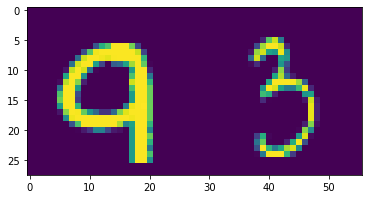

In [8]:
sampleplot(4)

1568    15.0
Name: 5, dtype: float64


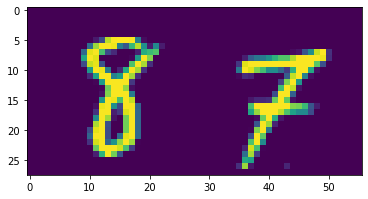

In [9]:
sampleplot(5)

1568    9.0
Name: 6, dtype: float64


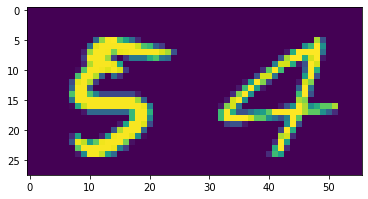

In [10]:
sampleplot(6)

<font size="3"> From above, we can see that the sum of two digits equal to the last coordinate of each line. </font>

## 7. (a) & (b) & (c)

In [114]:
# Data Process
Y_train = np.array(train_data[1568])
Y_train = torch.from_numpy(Y_train).double()
X_train = np.array(train_data[train_data.columns[0:1568]]).reshape(20000,1,28,56)
X_train = torch.from_numpy(X_train).double()


# Test Data
Y_test = np.array(test_data[1568])
Y_test = torch.from_numpy(Y_test).double()
X_test = np.array(test_data[test_data.columns[0:1568]]).reshape(5000,1,28,56)
X_test = torch.from_numpy(X_test).double()


# Validation Data
Y_val = np.array(val_data[1568])
Y_val = torch.from_numpy(Y_val).double()
X_val = np.array(val_data[val_data.columns[0:1568]]).reshape(5000,1,28,56)
X_val = torch.from_numpy(X_val).double()



### Replication From Paper 

In [110]:
class sum_model(nn.Module):
    def __init__(self):
        super(sum_model, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3) # Output Shape 26 * 54 * 32
        self.conv2 = nn.Conv2d(32, 16, 3) # Output Shape 24 * 52 * 16
        self.pool1 = nn.MaxPool2d(2) # Output Shape 12 * 26 * 16 
        self.do = nn.Dropout(0.25) 
        self.flatten = nn.Flatten() # Output Shpae 16 * 312
        self.linear1 = nn.Linear(312, 16) # ouput shape 16 * 16
        self.do2 = nn.Dropout(0.5)
        self.linear2 = nn.Linear(256, 100)
        self.linear3 = nn.Linear(100, 1)
        
    
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = self.pool1(x)
        x = self.do(x)
        x = self.flatten(x)
        x = F.relu(self.linear1(x))
        x = x.reshape(-1)
        x = self.do2(x)
        x = F.relu(self.linear2(x))
        x = self.linear3(x)
        
        return x

In [111]:
net5 = sum_model().double()
optimizer = optim.Adadelta(net5.parameters(), lr = 1.0, rho = 0.95, eps = 1e-08, weight_decay = 0)
loss = nn.MSELoss()

In [112]:
# Define HyperParameters
learning_rate = 0.1 
batch_size = 64
num_epochs = 150


In [63]:
def train_loop7(feature,label, model, loss_fn, optimizer):
    running_loss, correct = 0, 0
    size = len(feature)
    for index, X in enumerate(feature):
        # Compute prediction and loss
        y = label[index]
        pred = model(X)
        loss = loss_fn(pred, y)
        running_loss += loss.item()
        correct += (torch.round(pred) == y).type(torch.float).sum().item()
        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    running_loss = running_loss / size
    correct /= size
    print('Training loss: {}'.format(running_loss)) 
    print('Training accuracy: {}'.format(correct))
    return running_loss, correct


def test_loop7(feature,label, model, loss_fn):
    size = len(feature)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for index, X in enumerate(feature):
            pred = model(X)
            y = label[index]
            test_loss += loss_fn(pred, y).item()
            correct += (torch.round(pred) == y).type(torch.float).sum().item()

    test_loss /= size
    correct /= size
    print('Testing loss: {}'.format(test_loss))
    print('Testing accuracy: {}'.format(correct))
    return test_loss, correct

In [64]:
start_time = time.time()
test_loss_record = []
train_loss_record =[]
for i in range(num_epochs):
    print(f"Epoch {i+1}\n-------------------------------")
    train_loss_record.append(train_loop7(X_train,Y_train,net5,loss,optimizer))
    test_loss_record.append(test_loop7(X_test,Y_test,net5,loss))
print('Done')
print('Total Time Consumed: {}'.format(time.time() - start_time))

Epoch 1
-------------------------------
Training loss: 5.777550948732571
Testing loss: 5.651147046426225
Epoch 2
-------------------------------
Training loss: 5.043183291388757
Testing loss: 5.236501086285939
Epoch 3
-------------------------------
Training loss: 4.643664603226585
Testing loss: 4.7924168402606675
Epoch 4
-------------------------------
Training loss: 4.366031868297606
Testing loss: 4.776696012011342
Epoch 5
-------------------------------
Training loss: 4.23021702950483
Testing loss: 5.218155839606186
Epoch 6
-------------------------------
Training loss: 4.062296701751295
Testing loss: 4.146164323101252
Epoch 7
-------------------------------


KeyboardInterrupt: 

In [ ]:
loss_plot(train_loss_record, test_loss_record)

In [ ]:
error_plot(train_loss_record, test_loss_record)

In [ ]:
torch.save(net5.state_dict(), '../output/Arithmetic/sum_model.pkl')